Importing Libraries

In [1]:
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

Data Directory

In [2]:
data_dir = pathlib.Path("split/train")
data_dir

WindowsPath('split/train')

Finding Image Count

In [3]:
image_count = len(list(data_dir.glob("*/*.[jJ][pP][gG]")))
image_count

1273

Labelling Images - Binary Classification

In [4]:
images_dict = {
    'corrosion': list(data_dir.glob('CORROSION/*')),
    'nocorrosion': list(data_dir.glob('NOCORROSION/*'))
}

label_dict = {
    'corrosion': 0,
    'nocorrosion': 1
}

Image Loading

In [5]:
X, y = [], []

for input_image, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:  # Check if the image was loaded successfully
            img = cv2.resize(img, (180, 180))
            X.append(img)
            y.append(label_dict[input_image])
        else:
            # Handle the case where the image could not be loaded or is empty
            print(f"Skipping image: {image}")

Conversion to Array

In [6]:
X = np.array(X)
y = np.array(y)

Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaling

In [8]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

Defining Model

In [9]:
num_classes = 2

model = Sequential([
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

Model Training

In [10]:
model.fit(X_train_scaled, y_train, epochs = 15)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.5235 - loss: 1.5789
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.5206 - loss: 0.6900
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.6144 - loss: 0.6527
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.7162 - loss: 0.5863
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8009 - loss: 0.4449
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8563 - loss: 0.3686
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.8970 - loss: 0.2797
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9021 - loss: 0.2315
Epoch 9/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9166 - loss: 0.2223
Epoch 10/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9578 - loss: 0.1206
Epoch 11/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9594 - loss: 0.1495
Epoch 12/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy:

Saving the Model

In [11]:
#model.save("Rust_v1.h5")

Testing the Model

In [12]:
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Load the saved model
model = tf.keras.models.load_model("Rust_v1.h5")

# Define the image directory for new images
new_images_dir = pathlib.Path("test_new")
new_images = list(new_images_dir.glob("*.jpg"))

# Preprocess the new images
X_new = []
for image_path in new_images:
    img = cv2.imread(str(image_path))
    if img is not None:
        img = cv2.resize(img, (180, 180))
        X_new.append(img)
    else:
        print(f"Skipping image: {image_path}")

X_new = np.array(X_new)
X_new_scaled = X_new / 255.0  # Scale the pixel values

# Make predictions on the new images
predictions = model.predict(X_new_scaled)

# Get class labels from predictions
predicted_labels = [np.argmax(prediction) for prediction in predictions]

# Define class labels
class_labels = ['corrosion', 'nocorrosion']

# Display predictions
for image_path, predicted_label in zip(new_images, predicted_labels):
    print(f"Image: {image_path.name}, Predicted Label: {class_labels[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Image: c1.jpg, Predicted Label: corrosion
Image: c2.jpg, Predicted Label: corrosion
Image: c3.jpg, Predicted Label: corrosion
Image: nc1.jpg, Predicted Label: nocorrosion
Image: nc2.jpg, Predicted Label: nocorrosion
Image: nc3.jpg, Predicted Label: nocorrosion
Image: nc4.jpg, Predicted Label: nocorrosion
Image: nc5.jpg, Predicted Label: nocorrosion


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


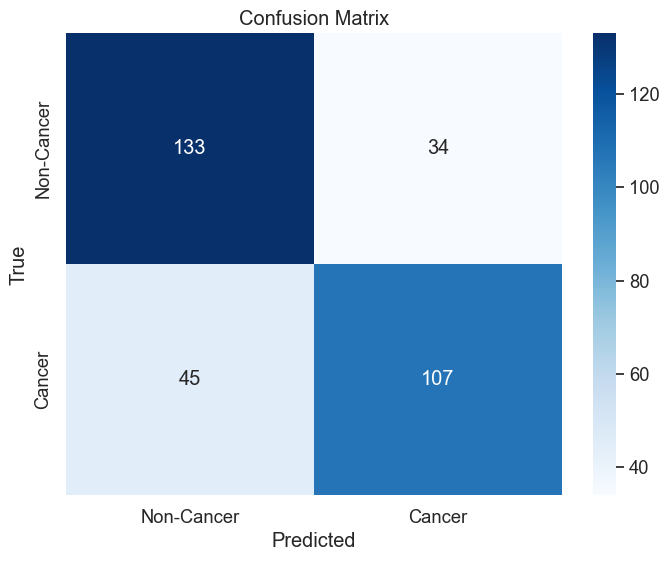

Accuracy: 0.7523510971786834


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Non-Cancer', 'Cancer'], yticklabels=['Non-Cancer', 'Cancer'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate accuracy based on the confusion matrix
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

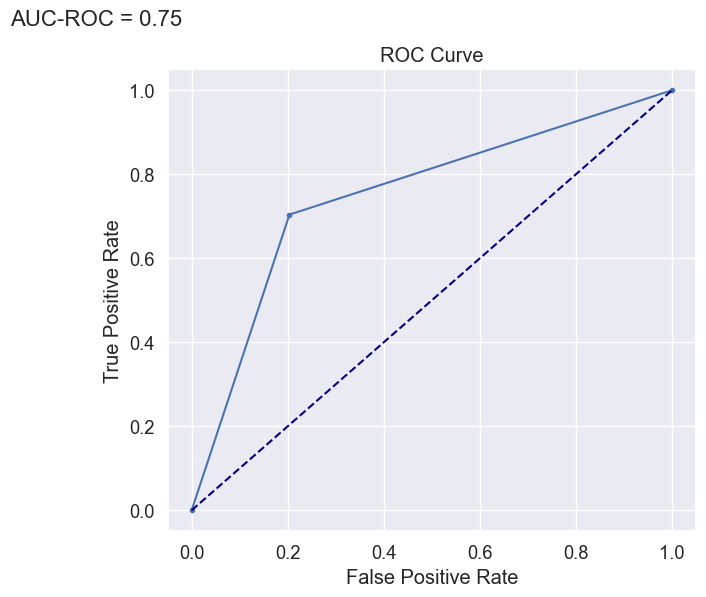

In [14]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_classes)

# Calculate ROC values
fpr, tpr, _ = roc_curve(y_test, y_pred_classes)

# Calculate AUC for ROC curve
roc_auc = auc(fpr, tpr)

# Create the subplots
plt.figure(figsize=(15, 6))

# Plot the ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Display AUC-ROC value
plt.suptitle(f'AUC-ROC = {roc_auc:.2f}', fontsize=16)

plt.show()